In [ ]:
# AIML-1 : Statistical Probability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

df=pd.read_csv('Gold Price Prediction.csv')

ModuleNotFoundError: No module named 'scipy'

In [3]:
df.head()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
0,8/7/24,2405.87,2384.90,2385.83,2385.83,0.93,8.82,30.155078,2414.7450,2368.2948,...,3.0,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,8/6/24,2442.74,2405.87,2384.90,2385.83,0.93,NaN,29.423936,2414.1525,2367.7916,...,3.0,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,8/5/24,2447.17,2442.74,2405.87,2384.90,-20.97,NaN,28.341301,2413.2305,2367.1584,...,3.0,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,8/2/24,2447.23,2447.17,2442.74,2405.87,-36.87,NaN,28.616661,2411.0920,2365.7250,...,3.0,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,8/1/24,2411.09,2447.23,2447.17,2442.74,-4.43,NaN,26.084796,2408.5670,2363.5624,...,3.0,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59


In [4]:
df.tail()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
671,1/7/22,1810.28,1791.61,1796.41,1801.52,5.11,38.17,NaN,450.8225,180.3290,...,7.5,0.1,71,0.05,0.87,1.76,96.26,4697.66,19.85,79.62
672,1/6/22,1813.88,1810.28,1791.61,1796.41,4.80,47.40,NaN,361.0020,144.4008,...,7.5,0.1,73,0.04,0.88,1.73,96.20,4693.39,20.29,77.24
673,1/5/22,1804.27,1813.88,1810.28,1791.61,-18.67,28.30,NaN,271.4215,108.5686,...,7.5,0.1,74,0.05,0.83,1.71,96.31,4787.99,17.07,77.18
674,1/4/22,1815.73,1804.27,1813.88,1810.28,-3.60,0.45,NaN,180.9075,72.3630,...,7.5,0.1,74,0.06,0.77,1.66,96.19,4804.51,16.57,76.02
675,1/3/22,1804.64,1829.05,1804.27,1813.88,9.61,14.95,NaN,90.2135,36.0854,...,7.5,0.1,74,0.05,0.78,1.63,95.67,4778.14,17.60,75.69


In [5]:
print("Dataset:\n", df)

Dataset:
        Date  Price 2 Days Prior  Price 1 Day Prior  Price Today  \
0    8/7/24             2405.87            2384.90      2385.83   
1    8/6/24             2442.74            2405.87      2384.90   
2    8/5/24             2447.17            2442.74      2405.87   
3    8/2/24             2447.23            2447.17      2442.74   
4    8/1/24             2411.09            2447.23      2447.17   
..      ...                 ...                ...          ...   
671  1/7/22             1810.28            1791.61      1796.41   
672  1/6/22             1813.88            1810.28      1791.61   
673  1/5/22             1804.27            1813.88      1810.28   
674  1/4/22             1815.73            1804.27      1813.88   
675  1/3/22             1804.64            1829.05      1804.27   

     Price Tomorrow  Price Change Tomorrow  Price Change Ten  Std Dev 10  \
0           2385.83                   0.93              8.82   30.155078   
1           2385.83              

In [6]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        Price 2 Days Prior  Price 1 Day Prior  Price Today  Price Tomorrow  \
count          676.000000         676.000000   676.000000       676.00000   
mean          1956.236228        1957.114305  1957.937944      1958.79824   
std            192.959980         193.560530   194.198338       194.80379   
min           1627.040000        1627.040000  1627.040000      1627.04000   
25%           1823.587500        1824.490000  1824.490000      1824.97000   
50%           1930.910000        1931.405000  1931.515000      1931.77500   
75%           2021.452500        2022.290000  2023.977500      2024.32750   
max           2469.650000        2469.650000  2469.650000      2469.65000   

       Price Change Tomorrow  Price Change Ten  Std Dev 10  \
count             676.000000        667.000000  667.000000   
mean                0.861672          8.944228   20.995813   
std                17.518782         55.640118   10.470747   
min               -81.890000    

In [7]:
DataFrame=df['Price Today_Z'] = zscore(df['Price Today'])
print("\nZ-Score for Gold Price Today:\n", df[['Date', 'Price Today', 'Price Today_Z']])


Z-Score for Price Today:
        Date  Price Today  Price Today_Z
0    8/7/24      2385.83       2.205008
1    8/6/24      2384.90       2.200216
2    8/5/24      2405.87       2.308278
3    8/2/24      2442.74       2.498276
4    8/1/24      2447.17       2.521105
..      ...          ...            ...
671  1/7/22      1796.41      -0.832384
672  1/6/22      1791.61      -0.857119
673  1/5/22      1810.28      -0.760909
674  1/4/22      1813.88      -0.742358
675  1/3/22      1804.27      -0.791880

[676 rows x 3 columns]


In [8]:
df['Log_Price Today'] = np.log(df['Price Today'])
print("\nLog Transformation of Gold Price Today: \n", df [['Date', 'Price Today', 'Log_Price Today']])


Log Transformation of Price Today: 
        Date  Price Today  Log_Price Today
0    8/7/24      2385.83         7.777302
1    8/6/24      2384.90         7.776912
2    8/5/24      2405.87         7.785667
3    8/2/24      2442.74         7.800876
4    8/1/24      2447.17         7.802688
..      ...          ...              ...
671  1/7/22      1796.41         7.493546
672  1/6/22      1791.61         7.490870
673  1/5/22      1810.28         7.501237
674  1/4/22      1813.88         7.503223
675  1/3/22      1804.27         7.497911

[676 rows x 3 columns]


In [ ]:
# Sampling
# Randomly sample 20% of t he data
sample_data = df.sample(frac=0.2, random_state=42)

# Display the sample data
print("Sample Data: \n", sample_data.head())

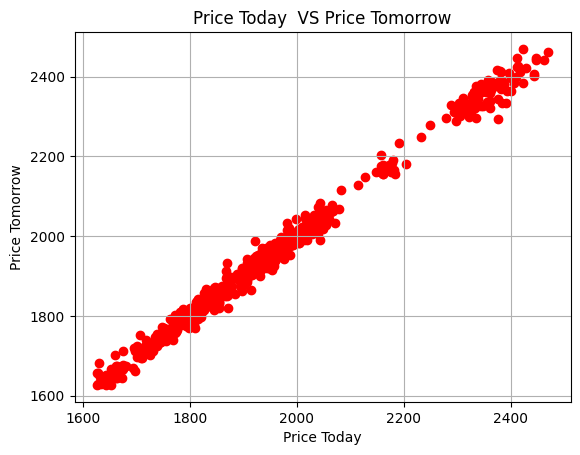

In [11]:
plt.scatter (df['Price Today'], df[ 'Price Tomorrow'], color='red')
plt.title('Price Today  VS Price Tomorrow')
plt.xlabel('Price Today')
plt.ylabel('Price Tomorrow')
plt.grid(True)
plt.show()